In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

<H1> Downloading Dataset for Latitude and Longitude of areas in Dubai

In [3]:
# The code was removed by Watson Studio for sharing.

,Places,Latitude,Longitude
0,Bur Dubai,25.267410,55.292679
1,Deira,25.287251,55.320190
2,International city,25.153710,55.404280
3,Academic city,25.194520,55.465220
4,Karama,25.244860,55.306000
5,Rashidiyah,25.226630,55.386970
6,Al Nahda,25.289709,55.374100
7,Knowledge Village,25.031130,55.211110
8,Jebel Ali,25.053990,55.115470
9,Qusais,25.267030,55.385690


<H1> Using Foursquare for exploring neighbourhood

In [25]:
CLIENT_ID = 'P3NXYCB1JH3TSZ1U0GENKQV0FRHFWNCITHCUWM4MKUWUQZ0J' # your Foursquare ID
CLIENT_SECRET = 'UTWW3FBF2RSDWONYM1KZPJBCKUTTHBZFWOOBPLUDHLKZCKY2' # your Foursquare Secret

 
VERSION = '20191213' # Foursquare API version
LIMIT= '1000'


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P3NXYCB1JH3TSZ1U0GENKQV0FRHFWNCITHCUWM4MKUWUQZ0J
CLIENT_SECRET:UTWW3FBF2RSDWONYM1KZPJBCKUTTHBZFWOOBPLUDHLKZCKY2


In [26]:
import requests
def getNearbyVenues(names ,near, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION, 
           
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            near,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Country',
                             
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                 
                  'Venue Latitude', 
                  'Venue Longitude',
                              'Category'
                            ]
                 
    
    return(nearby_venues)

In [27]:
Dubai_venues = getNearbyVenues(names=df_Dubai['Places'],
                              near= 'Dubai',
                            
                                   latitudes=df_Dubai['Latitude'],
                                   longitudes=df_Dubai['Longitude'])


Bur Dubai
Deira
International city
Academic city
Karama
Rashidiyah
Al Nahda
Knowledge Village
Jebel Ali
Qusais


In [28]:
print(Dubai_venues.shape)
Dubai_venues.head(3)

(891, 8)


,Neighborhood,Country,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,Bur Dubai,Dubai,25.26741,55.292679,Special Ostadi Kabab (كباب أستادي الخاص),25.259961,55.298940,Persian Restaurant
1,Bur Dubai,Dubai,25.26741,55.292679,MAKE Art Cafe,25.263960,55.299542,Café
2,Bur Dubai,Dubai,25.26741,55.292679,Vaibhav Restaurant,25.262207,55.294108,Indian Restaurant


<H2> Filtering Category to only Restaurants

In [29]:
Restaurant_Category = Dubai_venues[Dubai_venues['Category'].str.contains('Restaurant')].reset_index(drop=True)
Restaurant_Category.index = np.arange(1,len(Restaurant_Category)+1)
print("Shape of Dataframe with only Restaurants Category:",Restaurant_Category.shape)

Restaurant_Category.head(10)



Shape of Dataframe with only Restaurants Category: (567, 8)


,Neighborhood,Country,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
1,Bur Dubai,Dubai,25.26741,55.292679,Special Ostadi Kabab (كباب أستادي الخاص),25.259961,55.298940,Persian Restaurant
2,Bur Dubai,Dubai,25.26741,55.292679,Vaibhav Restaurant,25.262207,55.294108,Indian Restaurant
3,Bur Dubai,Dubai,25.26741,55.292679,Miyako 京,25.278925,55.304343,Japanese Restaurant
4,Bur Dubai,Dubai,25.26741,55.292679,Piadera,25.263148,55.306470,Italian Restaurant
5,Bur Dubai,Dubai,25.26741,55.292679,Karachi Darbar,25.274899,55.306050,Asian Restaurant
6,Bur Dubai,Dubai,25.26741,55.292679,Minato,25.265595,55.309761,Japanese Restaurant
7,Bur Dubai,Dubai,25.26741,55.292679,Elia Greek Restaurant,25.253783,55.293597,Greek Restaurant
8,Bur Dubai,Dubai,25.26741,55.292679,Al Dawaar,25.279111,55.304414,Restaurant
9,Bur Dubai,Dubai,25.26741,55.292679,Bateaux Dubai #BateauxDubai,25.261593,55.308792,Restaurant
10,Bur Dubai,Dubai,25.26741,55.292679,Jumeirah-At BURJ AL ARAB,25.250937,55.291935,Asian Restaurant


In [30]:
Restaurant_Category.groupby(['Neighborhood','Category']).size()

Neighborhood        Category                     
Academic city       Restaurant                        3
                    Seafood Restaurant                1
Al Nahda            Afghan Restaurant                 1
                    American Restaurant               3
                    Asian Restaurant                  2
                    Falafel Restaurant                4
                    Fast Food Restaurant              9
                    Indian Restaurant                 6
                    Italian Restaurant                4
                    Latin American Restaurant         1
                    Mediterranean Restaurant          2
                    Middle Eastern Restaurant        21
                    Pakistani Restaurant              1
                    Restaurant                        6
                    Seafood Restaurant                2
                    Sushi Restaurant                  1
                    Thai Restaurant                   

In [31]:
address = 'Dubai,UAE'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dubai City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Dubai City are 25.0657, 55.1713.


In [32]:
# create map of Dubai using latitude and longitude values
map_Dubai = folium.Map(location=[latitude, longitude], zoom_start=10)

rainbow = ['#3186cc','blue','green','yellow']
# add markers to map
for places,lat, lng in zip(Restaurant_Category['Neighborhood'],Restaurant_Category['Venue Latitude'], Restaurant_Category['Venue Longitude']):
    label = '{}'.format(places)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'green',
        fill=True,
        fill_color='pink',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Dubai)  
    
map_Dubai

In [34]:
Variety_Restaurant = pd.DataFrame(Restaurant_Category.groupby(['Neighborhood']).size(),columns={'Count'})
#Variety_Restaurant.reset_index(inplace = True) 


Variety_Restaurant


,Count
Neighborhood,
Academic city,4
Al Nahda,67
Bur Dubai,79
Deira,76
International city,47
Jebel Ali,58
Karama,79
Knowledge Village,41
Qusais,63


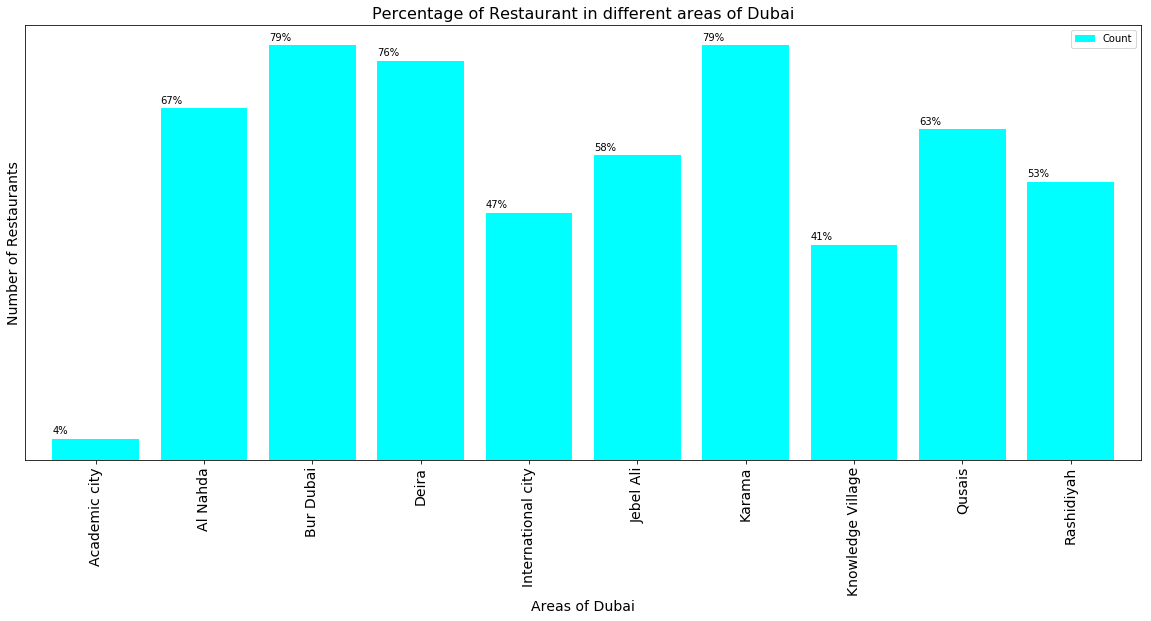

In [35]:
ax = Variety_Restaurant.plot(kind='bar', figsize=(20, 8),width=0.8,color = ['cyan'])

plt.title('Percentage of Restaurant in different areas of Dubai',fontsize=16)
plt.xlabel('Areas of Dubai',fontsize=14)
plt.ylabel('Number of Restaurants',fontsize=14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}%'.format(height), (x, y + height + 1))



plt.show()

<H1>Finding out Authentic Indian Restaurants in Dubai

In [36]:
df_IndRest = Dubai_venues[Dubai_venues['Category'].str.contains('Indian')].reset_index(drop=True)
print("Shape of Dataframe having only Indian Restaurants:",df_IndRest.shape) 
df_IndRest.index = np.arange(1,len(df_IndRest)+1)
df_IndRest.head(5)


Shape of Dataframe having only Indian Restaurants: (59, 8)


,Neighborhood,Country,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
1,Bur Dubai,Dubai,25.26741,55.292679,Vaibhav Restaurant,25.262207,55.294108,Indian Restaurant
2,Bur Dubai,Dubai,25.26741,55.292679,Aaramam Restaurant,25.249788,55.306658,Indian Restaurant
3,Bur Dubai,Dubai,25.26741,55.292679,Rasoi Ghar,25.250422,55.301766,North Indian Restaurant
4,Bur Dubai,Dubai,25.26741,55.292679,Gazebo مطعم جازيبو,25.252495,55.287969,Indian Restaurant
5,Bur Dubai,Dubai,25.26741,55.292679,Urban Tadka,25.248492,55.303344,Indian Restaurant


In [37]:
Area_wise_IndRest = pd.DataFrame(df_IndRest.groupby(['Neighborhood']).size(),columns={'Count'})

Area_wise_IndRest

,Count
Neighborhood,
Al Nahda,6
Bur Dubai,14
Deira,8
International city,3
Jebel Ali,3
Karama,14
Knowledge Village,2
Qusais,3
Rashidiyah,6


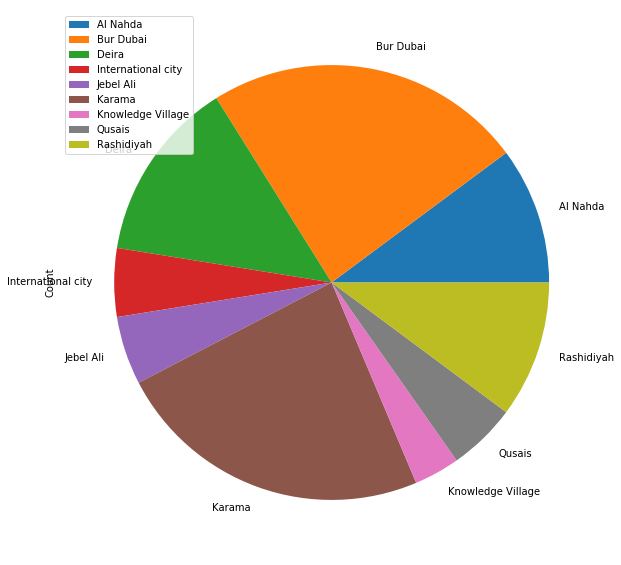

In [38]:
Area_wise_IndRest.plot(x ='Neighborhood', y='Count', kind = 'pie',figsize=(10, 10))


<H1>Clusterring Indian Restaurants using K means

In [57]:
kclusters = 10

restaurant_clustering = df_IndRest.drop(['Neighborhood','Country','Neighborhood Latitude','Neighborhood Longitude','Venue','Category'], 1)

restaurant_clustering 
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 7, 1], dtype=int32)

In [ ]:
df_IndRest.insert(0, 'Cluster Labels', kmeans.labels_)

In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_IndRest['Venue Latitude'], df_IndRest['Venue Longitude'], df_IndRest['Neighborhood'], df_IndRest['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters